## Inferential Statistics and Linear Regression

**Importing the necessary modules and libraries**

In [63]:
pip install pandas numpy matplotlib scikit-learn seaborn statsmodels

  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.4 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

**Importing the dataset**

In [4]:
df = pd.read_csv("Carseats.csv")

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [12]:
for i in df.select_dtypes('object') :
    print(df[i].value_counts(), end="\n\n")

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

Urban
Yes    282
No     118
Name: count, dtype: int64

US
Yes    258
No     142
Name: count, dtype: int64



In [14]:
LE = LabelEncoder()
for i in df.select_dtypes('object') :
    df[i] = LE.fit_transform(df[i])

In [16]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [17]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


**a. Fit a multiple regression model to predict Sales using Price, Urban, and US.**

In [24]:
x = df[['Price', 'Urban', 'US']]
y = df['Sales']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
LR = LinearRegression()

LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
LR.score(x_test, y_test)

0.21433892437588353

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


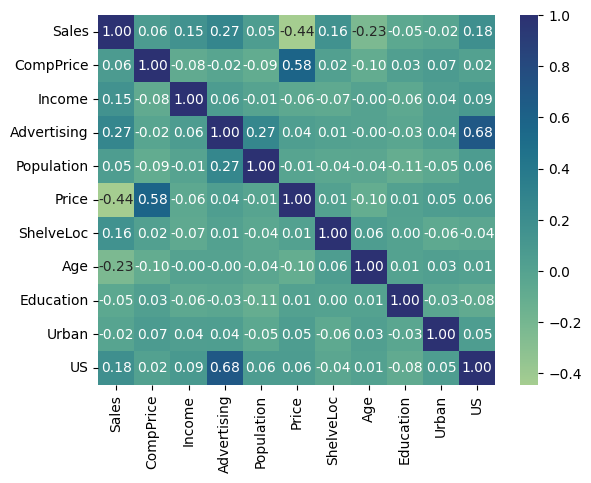

In [60]:
corr = df.corr()

sns.heatmap(corr, cmap="crest", annot=True, fmt=".2f")
corr

**b. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

In [54]:
print("Intercept:", LR.intercept_)
for col, coef in zip(x.columns, LR.coef_):
    print(f"{col}: {coef:.4f}")

Intercept: 12.900230314483789
Price: -0.0528
Urban: -0.1090
US: 1.0978


* **Price:** Negative → higher prices reduce sales. Even though the number looks small, since Price can vary widely (say, from 100–200), it can have a large effect.

* **Urban:** Slightly negative → urban stores have slightly lower sales, but effect is very small (and maybe insignificant).

* **US:** Strong positive → being in US increases sales by ~1.1 units on average, a big effect because it’s a binary feature.

**c. Write out the model in equation form, being careful to handle the qualitative variables properly.**

In [59]:
intercept = LR.intercept_
coefs = dict(zip(x.columns, LR.coef_))

equation = f"Sales = {intercept:.4f}"
for var, coef in coefs.items():
    equation += f" + ({coef:.4f} * {var})"

print("\nRegression Equation:")
print(equation)

# --- Piecewise form ---
print("\nPiecewise interpretation:")
print(f"Rural & non-US: Sales = {intercept:.4f} + ({coefs['Price']:.4f} * Price)")
print(f"Urban & non-US: Sales = {intercept:.4f} + ({coefs['Price']:.4f} * Price) + ({coefs['Urban']:.4f})")
print(f"Rural & US:     Sales = {intercept:.4f} + ({coefs['Price']:.4f} * Price) + ({coefs['US']:.4f})")
print(f"Urban & US:     Sales = {intercept:.4f} + ({coefs['Price']:.4f} * Price) + ({coefs['Urban']:.4f}) + ({coefs['US']:.4f})")


Regression Equation:
Sales = 12.9002 + (-0.0528 * Price) + (-0.1090 * Urban) + (1.0978 * US)

Piecewise interpretation:
Rural & non-US: Sales = 12.9002 + (-0.0528 * Price)
Urban & non-US: Sales = 12.9002 + (-0.0528 * Price) + (-0.1090)
Rural & US:     Sales = 12.9002 + (-0.0528 * Price) + (1.0978)
Urban & US:     Sales = 12.9002 + (-0.0528 * Price) + (-0.1090) + (1.0978)


**d. For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?**

In [ ]:
# Add constant term for intercept
X = sm.add_constant(x)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print full regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.39e-23
Time:                        11:29:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

* **Price** usually has a small p-value → reject H₀ → Price is significant.

* **Urban** usually has a large p-value (often >0.05) → fail to reject H₀ → Urban is not significant.

* **US** usually has a very small p-value → reject H₀ → US is highly significant.

**e. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

Testing with all columns to check which columns provide significant contribution in predicting Sales

In [ ]:
x = df.drop('Sales', axis=1)
y = df['Sales']

# Add constant term for intercept
X = sm.add_constant(x)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print full regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     52.33
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           6.94e-66
Time:                        11:31:22   Log-Likelihood:                -811.89
No. Observations:                 400   AIC:                             1646.
Df Residuals:                     389   BIC:                             1690.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9961      1.103      6.342      

**Significant predictors:**

* CompPrice
* Income
* Advertising
* Price
* ShelveLoc
* Age

In [ ]:
# Assuming df is already loaded
X_small = df[["CompPrice", "Income", "Advertising", "Price", "ShelveLoc", "Age"]]
y = df["Sales"]

# Add constant term for intercept
X_small = sm.add_constant(X_small)

# Fit the smaller OLS model
model_small = sm.OLS(y, X_small).fit()

# Print summary
print(model_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     87.58
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.31e-69
Time:                        11:34:19   Log-Likelihood:                -812.57
No. Observations:                 400   AIC:                             1639.
Df Residuals:                     393   BIC:                             1667.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.4379      0.920      6.996      

**f. How well do the models in (a) and (e) fit the data?**

In [71]:
# --- Model (a): using Price, US, Urban ---
X_a = df[["Price", "US", "Urban"]]
y = df["Sales"]

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_a["US"] = le.fit_transform(X_a["US"])
X_a["Urban"] = le.fit_transform(X_a["Urban"])

# Add constant for intercept
X_a = sm.add_constant(X_a)

# Fit OLS model
model_a = sm.OLS(y, X_a).fit()

# Print summary for model (a)
print("Model (a) Summary:")
print(model_a.summary())

# --- Model (e): smaller model with significant predictors ---
X_e = df[["CompPrice", "Income", "Advertising", "Price", "ShelveLoc", "Age"]]
X_e = sm.add_constant(X_e)
model_e = sm.OLS(y, X_e).fit()

# Print summary for model (e)
print("\nModel (e) Summary:")
print(model_e.summary())

# --- Optional: print R-squared and adjusted R-squared for quick comparison ---
print("\nQuick comparison:")
print(f"Model (a) R²: {model_a.rsquared:.3f}, Adjusted R²: {model_a.rsquared_adj:.3f}")
print(f"Model (e) R²: {model_e.rsquared:.3f}, Adjusted R²: {model_e.rsquared_adj:.3f}")


Model (a) Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.39e-23
Time:                        11:53:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651 

/tmp/ipykernel_8408/1894528058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_a["US"] = le.fit_transform(X_a["US"])
/tmp/ipykernel_8408/1894528058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_a["Urban"] = le.fit_transform(X_a["Urban"])


**g. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).**

In [69]:
# Assuming your smaller model is stored in 'model_small'

# Get 95% confidence intervals
conf_intervals = model_small.conf_int(alpha=0.05)  # 95% CI
conf_intervals.columns = ['2.5%', '97.5%']

print("95% Confidence Intervals for Coefficients:")
print(conf_intervals)


95% Confidence Intervals for Coefficients:
                 2.5%     97.5%
const        4.628714  8.247169
CompPrice    0.078366  0.107969
Income       0.007694  0.020883
Advertising  0.101936  0.157292
Price       -0.102192 -0.083033
ShelveLoc    0.386320  0.827808
Age         -0.058211 -0.035405


**h. Is there evidence of outliers or high leverage observations in the model from (e)?**

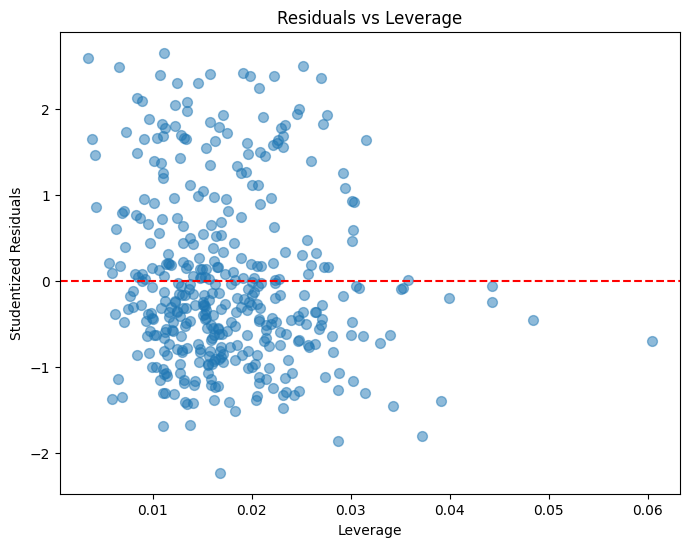

In [ ]:
# Assuming model_small is your fitted smaller model

# Get influence measures
influence = model_small.get_influence()

# Studentized residuals (detect outliers)
studentized_residuals = influence.resid_studentized_external

# Leverage values (detect high-leverage points)
leverage = influence.hat_matrix_diag

# Cook's distance (detect influential points)
cooks_d = influence.cooks_distance[0]

# Plot residuals vs leverage
plt.figure(figsize=(8,6))
plt.scatter(leverage, studentized_residuals, s=50, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Residuals vs Leverage')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()